# Definitions for Dose Calculations

In [1]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import mpUtilities.mc2 as mc2
import mpUtilities.graphUtils as grp
# Note the mpUtilities libraries are custom libraries
import matplotlib.pyplot as plt
import numpy as np

### Percentage Depth Dose (PDD)

The percentage depth dose is calculated for a fixed SSD with the field size defined at the SSD

$$ PDD(A_{SSD}, z) = \frac{D(A_{SSD}, z)}{D(A_{SSD}, z_{D_{max}})} \times 100 $$

$D(A_{SSD}, z)$ is the measured dose at depth $z$

$D(A_{SSD}, z_{D_{}max})$ is the dose maximum. 

As the PDD is a ratio of two measurements it is dependent upon the SSD (source to skin distance)

(0, 110)

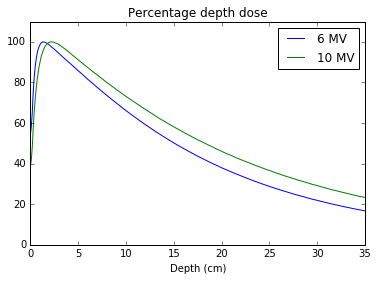

In [2]:
pdd_06=mc2.read_mc2("./data/MV/6x_PDD_10x10cm.mcc", 4, 154)
pdd_10=mc2.read_mc2("./data/MV/10x_PDD_10x10cm.mcc", 4, 154)
pdd_06.ynorm=grp.normalise_to_max(pdd_06.xdata,pdd_06.ydata)
pdd_10.ynorm=grp.normalise_to_max(pdd_10.xdata,pdd_10.ydata)
plt.plot(pdd_06.xdata/10, pdd_06.ynorm, label="6 MV")
plt.plot(pdd_10.xdata/10, pdd_10.ynorm, label="10 MV")
plt.legend()
plt.xlabel("Depth (cm)")
plt.title("Percentage depth dose")
plt.ylim(0,110)

### Depth Dose Components
Dose at a particular point can be divided into dose from _primary_ and _scattered_ components.  The total dose, $D_T$ is the sum of the primary dose, $D_p$ and the scattered dose $D_s$:

$$ D_T = D_p + D_s $$

### Primary Dose
Primary dose is due to photons that have not experinced _scatter_.  This is represented by the dose in a hypothetical 0 x 0 cm field.

### Tissue Phantom Ratio (TPR)

The tissue phantom ratio is the dose at a given point on the central axis in a phantom to the dose at the same point at a fixed reference point ($d_{ref}$).

$$ TPR(A_{SSD}, z, z_{cal~}) = \frac{D(A_{SSD}, SSD, z)}{D(A_{SSD}, SSD, z_{D_{cal}})} $$

If the chosen refernce point, $d_{ref}$ is at $d_{max}$, then the TPR becomes a TMR (_Tissue Maximum Ratio_)